## **04-03 문서 단어 행렬(Document-Term Matrix, DTM)**
---

서로 다른 문서들의 BoW들을 결합한 표현 방법인 문서 단어 행렬(Document-Term Matrix, DTM) 표현 방법을 배워보겠습니다. 이하 DTM이라고 명명합니다. 행과 열을 반대로 선택하면 TDM이라고 부르기도 합니다. 이렇게 하면 서로 다른 문서들을 비교할 수 있게 됩니다.

---
### **1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법**

**문서 단어 행렬(Document-Term Matrix, DTM)** 이란 **다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것** 을 말합니다. 쉽게 생각하면 각 문서에 대한 BoW를 **하나의 행렬** 로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어입니다. 예를 들어서 이렇게 4개의 문서가 있다고 합시다.
  
> 문서1 : 먹고 싶은 사과  
> 문서2 : 먹고 싶은 바나나  
> 문서3 : 길고 노란 바나나 바나나  
> 문서4 : 저는 과일이 좋아요**  
  
띄어쓰기 단위 토큰화를 수행한다고 가정하고, 문서 단어 행렬로 표현하면 다음과 같습니다.

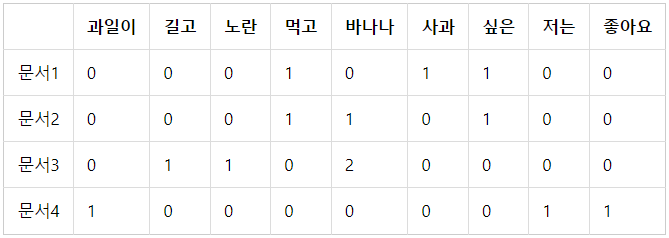

각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기합니다. 문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 갖습니다. 만약 필요에 따라서는 형태소 분석기로 단어 토큰화를 수행하고, 불용어에 해당되는 조사들 또한 제거하여 더 정제된 DTM을 만들 수도 있을 것입니다.

---
### **2. 문서 단어 행렬(Document-Term Matrix)의 한계**

DTM은 매우 간단하고 구현하기도 쉽지만, 본질적으로 가지는 몇 가지 한계들이 있습니다.

#### **1) 희소 표현(Sparse representation)**
**원-핫 벡터** 는 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 되는 벡터입니다. 원-핫 벡터는 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 점에서 단점을 가집니다. **DTM** 도 마찬가지입니다. DTM에서의 각 행을 문서 벡터라고 해봅시다. 각 문서 벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기를 가집니다. 만약 가지고 있는 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수만 이상의 차원을 가질 수도 있습니다. 또한 많은 문서 벡터가 대부분의 값이 0을 가질 수도 있습니다. 당장 위에서 예로 들었던 문서 단어 행렬의 모든 행이 0이 아닌 값보다 0의 값이 더 많은 것을 볼 수 있습니다.

원-핫 벡터나 DTM과 같은 대부분의 값이 0인 표현을 **희소 벡터(sparse vector)** 또는 **희소 행렬(sparse matrix)** 라고 부르는데, 희소 벡터는 많은 양의 저장 공간과 높은 계산 복잡도를 요구합니다. 이러한 이유로 전처리를 통해 단어 집합의 크기를 줄이는 일은 BoW 표현을 사용하는 모델에서 중요할 수 있습니다. 앞서 배운 텍스트 전처리 방법을 사용하여 **구두점, 빈도수가 낮은 단어, 불용어를 제거** 하고, **어간이나 표제어 추출** 을 통해 단어를 정규화하여 단어 집합의 크기를 줄일 수 있습니다.

#### **2) 단순 빈도 수 기반 접근**
여러 문서에 등장하는 모든 단어에 대해서 빈도 표기를 하는 이런 방법은 때로는 **한계** 를 가지기도 합니다. 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장할 수 밖에 없습니다. 그런데 유사한 문서인지 비교하고 싶은 문서1, 문서2, 문서3에서 동일하게 **the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됩니다**.

각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있습니다. 앞서 **불용어(stopwords)** 와 같은 단어들은 빈도수가 높더라도 자연어 처리에 있어 의미를 갖지 못하는 단어라고 언급한 바 있습니다. 그렇다면 **DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법** 은 없을까요? 이러한 아이디어를 적용한 **TF-IDF** 를 이어서 학습해봅시다. 사이킷런의 CountVectorizer를 사용하여 DTM을 만드는 실습 또한 TF-IDF를 설명하면서 진행하겠습니다.

마지막 편집일시 : 2022년 11월 14일 2:47 오후